In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# generate random data matrix
n,d = 6,4
X = np.random.randn(n,d)

In [4]:
# optional: give it linearly dependent columns
# X[:,2] = X[:,1]

In [6]:
# form data from noisy linear model
wn = np.random.randn(d)
y = np.matmul(X,wn) + 0.1 * np.random.randn(n)

In [7]:
# look at least squares objective as a function of w
def f(w):
    return (np.linalg.norm(y - np.dot(X,w),2)**2)

In [8]:
def deltaf(w):
     return (2*np.dot(np.dot(np.transpose(X),X),w) - 2*np.dot(np.transpose(X),y))

In [9]:
# gradient at w0 approximates f(w) near w0
w0 = np.random.randn(d)
v = np.random.randn(d)
alphas = np.linspace(-2,2,100)
delta_f = deltaf(w0)

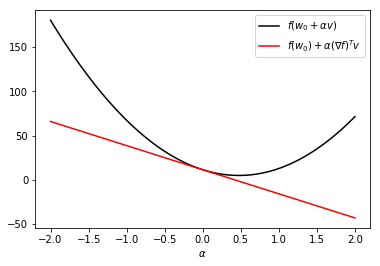

In [10]:
alpha = alphas[0]
plt.figure()
plt.plot(alphas, [f(w0 + alpha*v) for alpha in alphas], color="black", label=r"$f(w_0 + \alpha v)$")
plt.plot(alphas, [f(w0) + alpha*np.matmul(delta_f, v) for alpha in alphas], color="red",label=r"$f(w_0) + \alpha (\nabla f)^T v$")
plt.legend()
plt.xlabel(r"$\alpha$")
plt.show()


F:\install\anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


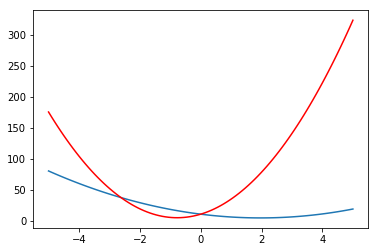

In [11]:
# function decreases fastest in the -∇f(w) direction
w0 = np.random.randn(d)
v = np.random.randn(d)
delta_f = delta_f = deltaf(w0)
v_normalized = v/np.linalg.norm(v)
delta_f_normalized = delta_f/np.linalg.norm(delta_f)
alphas = np.linspace(-5,5,100)
plt.figure()
plt.plot(alphas, [f(w0 + alpha*v_normalized) for alpha in alphas],label="y1")
plt.plot(alphas, [f(w0 + alpha*delta_f_normalized) for alpha in alphas],color="red",label="y2")
plt.legend()
plt.show()

In [12]:
# gradient descent
alpha = .1      # small constant step size
w = np.random.randn(d)     # start at a random w
fks = []  # a list to record all the values f(w) we see
fks.append(f(w)) # record the initial value

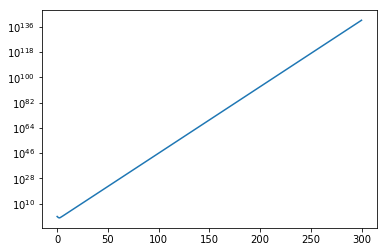

In [15]:
# start descending!
for k in range(0,100):
    w -= alpha*deltaf(w) # take a gradient step
    fks.append(f(w))            # record its value

#plt.plot(fks, label="sum of square errors")
plt.semilogy(fks)
#plt.loglog(fks)
plt.show()